<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Demonstrate-the-sounding-retrieval-code" data-toc-modified-id="Demonstrate-the-sounding-retrieval-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demonstrate the sounding retrieval code</a></span></li><li><span><a href="#Read-the-soundings-back-into-python" data-toc-modified-id="Read-the-soundings-back-into-python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the soundings back into python</a></span></li><li><span><a href="#Examine-the-nested-dictionaries-inside-soundings" data-toc-modified-id="Examine-the-nested-dictionaries-inside-soundings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine the nested dictionaries inside soundings</a></span></li><li><span><a href="#Get-the-first-sounding" data-toc-modified-id="Get-the-first-sounding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the first sounding</a></span></li><li><span><a href="#Plot-it" data-toc-modified-id="Plot-it-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot it</a></span></li></ul></div>

# Demonstrate the sounding retrieval code

In [1]:
from a405.soundings.wyominglib import write_soundings, read_soundings
from matplotlib import pyplot as plt

Ask for north american soundings between July 1, 2017 00Z and July 18, 2017 00Z for
Dodge City, Kansas  from http://weather.uwyo.edu/upperair/sounding.html

In [4]:
values=dict(region='naconf',year='2012',month='3',start='0100',stop='1800',station='72340')

Write the soundings into a folder called soundingdir

In [10]:
write_soundings(values, 'littlerock')

440858
header is:  72340 LZK Little Rock Observations at 00Z 01 Mar 2012
here is the day:  120301
here is the day:  120301
here is the day:  120302
here is the day:  120302
here is the day:  120302
here is the day:  120303
here is the day:  120303
here is the day:  120304
here is the day:  120304
here is the day:  120305
here is the day:  120305
here is the day:  120306
here is the day:  120306
here is the day:  120307
here is the day:  120307
here is the day:  120308
here is the day:  120308
here is the day:  120309
here is the day:  120309
here is the day:  120310
here is the day:  120310
here is the day:  120311
here is the day:  120311
here is the day:  120312
here is the day:  120312
here is the day:  120313
here is the day:  120313
here is the day:  120314
here is the day:  120314
here is the day:  120315
here is the day:  120315
here is the day:  120316
here is the day:  120316
here is the day:  120317
here is the day:  120317
here is the day:  120318
files written to littlerock

# Read the soundings back into python

In [6]:
soundings= read_soundings('soundingdir')

# Examine the nested dictionaries inside soundings

In [7]:
print((f'soundings keys: {list(soundings.keys())}\n'),
      (f'soundings attributes: {list(soundings["attributes"])}\n'),
      (f'sounding_dict keys: {list(soundings["sounding_dict"].keys())}'))

soundings keys: ['filelist', 'attributes', 'input_args', 'file_dict', 'sounding_dict']
 soundings attributes: ['units', 'site_id', 'latitude', 'longitude', 'elevation', 'header', 'history']
 sounding_dict keys: [(2012, 3, 1, 0), (2012, 3, 1, 12), (2012, 3, 2, 0), (2012, 3, 2, 12), (2012, 3, 2, 18), (2012, 3, 3, 0), (2012, 3, 3, 12), (2012, 3, 4, 0), (2012, 3, 4, 12), (2012, 3, 5, 0), (2012, 3, 5, 12), (2012, 3, 6, 0), (2012, 3, 6, 12), (2012, 3, 7, 0), (2012, 3, 7, 12), (2012, 3, 8, 0), (2012, 3, 8, 12), (2012, 3, 9, 0), (2012, 3, 9, 12), (2012, 3, 10, 0), (2012, 3, 10, 12), (2012, 3, 11, 0), (2012, 3, 11, 12), (2012, 3, 12, 0), (2012, 3, 12, 12), (2012, 3, 13, 0), (2012, 3, 13, 12), (2012, 3, 14, 0), (2012, 3, 14, 12), (2012, 3, 15, 0), (2012, 3, 15, 12), (2012, 3, 16, 0), (2012, 3, 16, 12), (2012, 3, 17, 0), (2012, 3, 17, 12), (2012, 3, 18, 0)]


# Get the first sounding

In [8]:
target_date=list(soundings['sounding_dict'].keys())[0]
the_sounding = soundings['sounding_dict'][target_date]
print(the_sounding.columns)

Index(['Unnamed: 0', 'pres', 'hght', 'temp', 'dwpt', 'relh', 'mixr', 'drct',
       'sknt', 'thta', 'thte', 'thtv'],
      dtype='object')


# Plot it

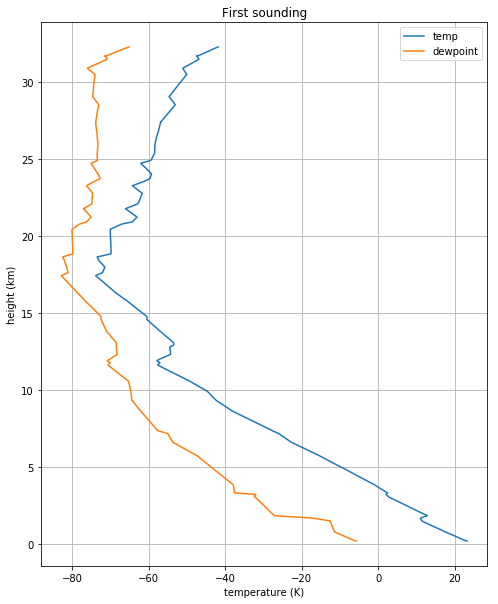

In [9]:
%matplotlib inline
m2km=1.e-3  #convert meters to km
fig,ax=plt.subplots(1,1,figsize=(8,10))
ax.plot(the_sounding['temp'],the_sounding['hght']*m2km,label='temp')
ax.plot(the_sounding['dwpt'],the_sounding['hght']*m2km,label='dewpoint')
ax.legend()
out=ax.set(xlabel="temperature (K)",ylabel="height (km)",
      title ="First sounding")
ax.grid(True)